# Product Clustering For Golha Co
we try to make come cluster of products based on their sales quantity to discover products with high degree of similarity in sales trends

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pylab as pl
%matplotlib inline


In [2]:
df=pd.read_excel('3_years_sales_production_2.xlsx')

In [3]:
df.head()

,productcode,ProductName,Production,Production_Predict,Sale,Year_month,year,month
0,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,18.0,12.0,10.0,1400/11,1400,11
1,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,4.0,4.8,4.0,1400/12,1400,12
2,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,21.0,14.4,12.0,1401/05,1401,5
3,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,1.0,1.2,1.0,1401/06,1401,6
4,22010001,ادویه پلوئی - (سلفون) - بسته نیم کیلویی,4.0,3.6,3.0,1401/07,1401,7


In [4]:
df.shape

(17971, 8)

In [5]:
df.dtypes

productcode             int64
ProductName            object
Production            float64
Production_Predict    float64
Sale                  float64
Year_month             object
year                    int64
month                   int64
dtype: object

In [6]:
cdf=df.copy()
cdf=cdf.fillna(0)
cdf.describe()

,productcode,Production,Production_Predict,Sale,year,month
count,1.797100e+04,1.797100e+04,1.797100e+04,1.797100e+04,17971.000000,17971.000000
mean,2.244120e+07,3.023597e+04,3.730405e+04,3.108355e+04,1401.085638,6.686439
std,4.889495e+05,4.515394e+05,4.804895e+05,4.004081e+05,0.803623,3.460631
min,2.201000e+07,-4.900196e+06,1.200000e+00,1.000000e+00,1400.000000,1.000000
25%,2.201020e+07,0.000000e+00,1.872000e+02,1.560000e+02,1400.000000,4.000000
50%,2.231003e+07,6.000000e+02,1.248000e+03,1.040000e+03,1401.000000,7.000000
75%,2.281001e+07,4.206500e+03,4.941600e+03,4.114000e+03,1402.000000,10.000000
max,2.371000e+07,1.646000e+07,1.659360e+07,1.382800e+07,1402.000000,12.000000


In [7]:
cdf.drop(columns=['ProductName'], inplace=True)

In [9]:
cdf.drop(columns=['Year_month'], inplace=True)

KeyError: "['Year_month'] not found in axis"

In [10]:
cdf.describe()

,productcode,Production,Production_Predict,Sale,year,month
count,1.797100e+04,1.797100e+04,1.797100e+04,1.797100e+04,17971.000000,17971.000000
mean,2.244120e+07,3.023597e+04,3.730405e+04,3.108355e+04,1401.085638,6.686439
std,4.889495e+05,4.515394e+05,4.804895e+05,4.004081e+05,0.803623,3.460631
min,2.201000e+07,-4.900196e+06,1.200000e+00,1.000000e+00,1400.000000,1.000000
25%,2.201020e+07,0.000000e+00,1.872000e+02,1.560000e+02,1400.000000,4.000000
50%,2.231003e+07,6.000000e+02,1.248000e+03,1.040000e+03,1401.000000,7.000000
75%,2.281001e+07,4.206500e+03,4.941600e+03,4.114000e+03,1402.000000,10.000000
max,2.371000e+07,1.646000e+07,1.659360e+07,1.382800e+07,1402.000000,12.000000


In [11]:
from sklearn.preprocessing import StandardScaler
x=cdf.values[:,:]
x=np.nan_to_num(x)
clus_dataset=StandardScaler().fit_transform(x)
clus_dataset
#x[:5]

array([[-0.88190459, -0.06692397, -0.07761478, -0.07760687, -1.3509671 ,
         1.24650133],
       [-0.88190459, -0.06695498, -0.07762977, -0.07762186, -1.3509671 ,
         1.53547404],
       [-0.88190459, -0.06691733, -0.07760979, -0.07760188, -0.10656783,
        -0.48733492],
       ...,
       [ 2.59503569, -0.06731819, -0.0715533 , -0.07154539,  1.13783144,
         0.95752862],
       [ 2.59503569, -0.06697048, -0.06282945, -0.06282154,  1.13783144,
         1.24650133],
       [ 2.59503569, -0.06699484, -0.07050434, -0.07049643,  1.13783144,
         1.53547404]])

# Elbow Point
- As we use DBSCAN model we need to know the best value for EPS parameter, so Using elbow point technique is one of the good method to find the best value for it. we need to find out what is the breaking point that decrease our change 

Variance of distances: 0.9013452637872823 7998000


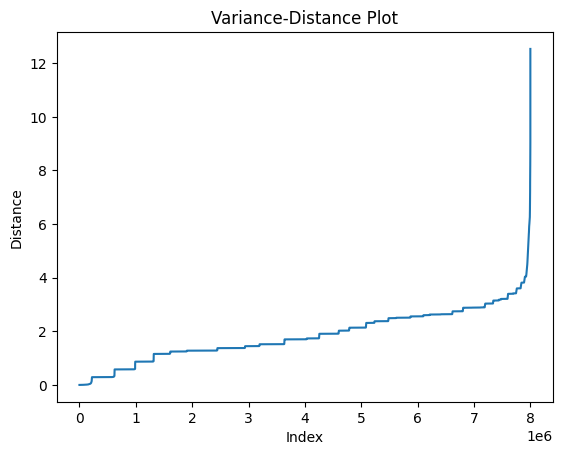

In [17]:
# 1.calculating distance between points
distances = []  
for i in range(4000):  
    for j in range(i+1, 4000):  
        distances.append(np.linalg.norm(clus_dataset[i] - clus_dataset[j]))  
        #print(distances)
# 2. var calculation
variance = np.var(distances)  
print("Variance of distances:", variance,len(distances))  

# 3.plot the variances
plt.plot(sorted(distances))  
plt.xlabel("Index")  
plt.ylabel("Distance")  
plt.title("Variance-Distance Plot")  
plt.show()

In [51]:
from sklearn.cluster import DBSCAN
epsilon=1.2
db = DBSCAN(eps=epsilon, min_samples=5).fit(clus_dataset)
labels=db.labels_
print(labels)

[0 0 1 ... 2 2 2]


Text(0, 0.5, 'Sale')

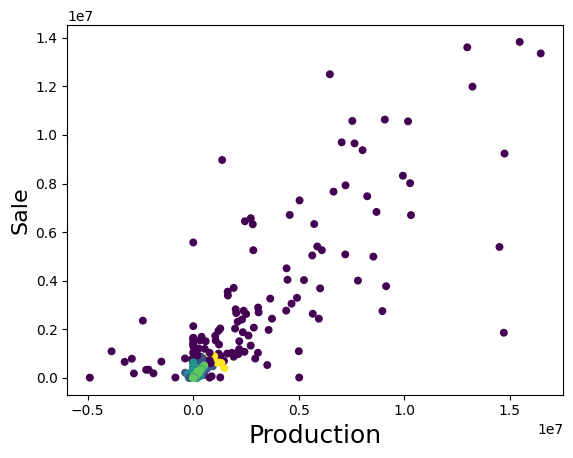

In [55]:
area=np.pi*(x[:,4]+x[:,5])*0.005
plt.scatter(x[:,1],x[:,3],s=area,c=labels.astype(float),alpha=1)
plt.xlabel('Production',fontsize=18)
plt.ylabel('Sale',fontsize=16)

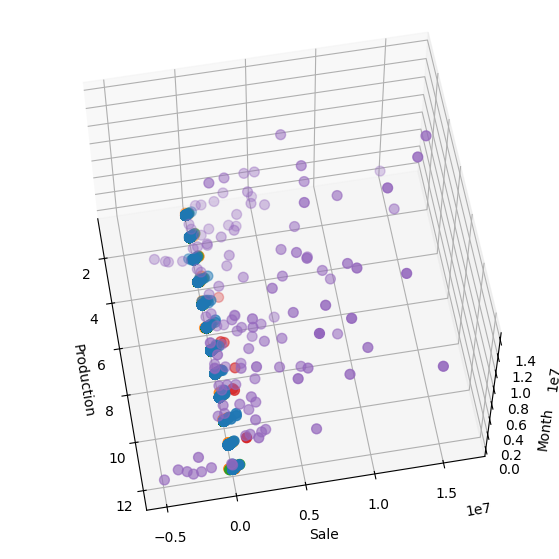

In [56]:
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure(1, figsize=(8, 7))  
plt.clf()  
ax = fig.add_subplot(111, projection='3d')  
ax.view_init(elev=60, azim=350)  
plt.cla()  
ax.set_xlabel('Production')  
ax.set_ylabel('Sale')  
ax.set_zlabel('Month')  

unique_labels = set(labels)  

# Define a colormap for the clusters  
cmap = plt.get_cmap('tab10')  

# Plot the points with fixed colors for each cluster  
for i, label in enumerate(unique_labels):  
    label_indices = labels == label  
    ax.scatter(x[label_indices, 5], x[label_indices, 1], x[label_indices, 3],   
               c=[cmap(i)], s=50)  
plt.show()  


In [57]:
cdf['cluster'] = labels  
cdf.head()  
cdf.groupby('cluster').size() 

cluster
-1     126
 0    5046
 1    6154
 2    6638
 3       7
dtype: int64

# Report:
- for the first step of sale and production data I decided to use Kmeans algorithm to cluster data and tried different number of clusters to make better segmentation . 
- the best grouping is made with 3 clusters . 
- because of the high noise in 2 clusters we cannot consider Kmeans as our dicision making model. a part of this noise comes from Kmeans algorithm
- we use DBSCAN on another file for this dataset again